# Toy Example


In [8]:
import numpy as np
from matplotlib import pyplot as plt
from supermariopy import plotting
import os

plotting.set_style()

%load_ext nb_black
%load_ext lab_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


<IPython.core.display.Javascript object>

In [9]:
def toy_example(n_P=20, outlier_ratio=0.1):
    x = np.linspace(0, 10, n_P)
    y = x.copy()
    n_outliers = int(n_P * outlier_ratio)
    # definition of outlier: uniform additive error model on interval [0, 10]

    o = np.random.uniform(-1, 1, n_outliers) * 10
    idx = np.random.choice(np.arange(n_P), n_outliers, replace=False)
    y[idx] += o
    return x, y


def original_example():
    x = np.array([0, 1, 2, 3, 3, 4, 10])
    y = np.array([0, 1, 2, 2, 3, 4, 2])
    return x, y

<IPython.core.display.Javascript object>

## Example : The Failing of Least Squares

Let's say we want to fit a model $M$ to a set of data points $P$. 
Ideally, our model is able fit the data points exactly, assuming the error in the data is small.
To give an example, let's assume M is simply a linear model, or in other words a line, which can be described by two parameters.
We can then write down our model for each data point.
$$
y_i = a \cdot x_i + b,~ i = 1, \dots, |P|
\Leftrightarrow 
    \underbrace{
        \begin{bmatrix} y_1 \\ \vdots \\ y_{|P|} \end{bmatrix} 
    }_{Y}
=   \underbrace{
        \begin{bmatrix} x_1 & 1 \\ \vdots & \vdots \\ x_{|P|} & 1 \end{bmatrix}
    }_{X}
    \underbrace{
        \begin{bmatrix} a & b \end{bmatrix}
    }_{M}
$$

We now assume two cases, a Gaussian error and a non-Gaussian error which resembles more likely outlier cases.
To fit the model M, we simply use a least-squares solution for both cases.
$$
M = X^\dagger Y
$$

Two cases with fitted models are depicted in Fig. 1.

Clearly, the Gaussian error is easy to handle with (in fact, the least-squares solution is optimal for Gaussian errors).
But the second case completely biases the model estimate towards a bad solution. Can we maybe do better than that?


In [10]:
def fit_model(S):
    x = S[:, 0]
    x_aug = np.stack([x, np.ones_like(x)], axis=1)
    y = S[:, 1]
    M, _, _, _ = np.linalg.lstsq(x_aug, y)
    return M

    with plt.rc_context(plotting.BLOG_RC_PARAMS_5x4):
        colors = plotting.get_palette("custom6")


def plot_P(ax, P, **kwargs):
    ax.scatter(P[:, 0], P[:, 1], **kwargs)


def plot_M(ax, P, M, **kwargs):
    ax.plot(P[:, 0], M[0] * P[:, 0] + M[1], **kwargs)


def add_legend_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles, labels, loc="upper right", ncol=2, frameon=True)


def set_lim_all(fig_or_ax_list, xlim, ylim):
    if isinstance(fig_or_ax_list, (list, np.ndarray)):
        for ax in fig_or_ax_list:
            ax.set_xlim(xlim)
            ax.set_ylim(ylim)


def get_rc_params_small(ncols, nrows, size_per_plot=(4, 4)):
    """Size per plot: (width, height)
    # TODO: write function which calculates RC params based on subplot layout
    # for example, scale figsize appropriately with number of RC params
    # scale fontsize appropriately with figsize
    """
    figsize = (size_per_plot[0] * ncols, size_per_plot[1] * nrows)
    RC_PARAMS = {
        "figure.figsize": figsize,
        "figure.dpi": 250,
        "figure.autolayout": True,
        "figure.titlesize": "large",
        "legend.frameon": True,
        "axes.titlesize": "large",
        "axes.labelsize": "medium",
        "xtick.labelsize": "medium",
        "ytick.labelsize": "medium",
        "legend.fontsize": "medium",
        "axes.grid": True,
    }
    return RC_PARAMS


def savefig(**kwargs):
    base = "ToyExample"
    os.makedirs(base, exist_ok=True)

    fname = kwargs.pop("fname")
    fname = os.path.join(base, fname)
    kwargs["fname"] = fname
    plt.savefig(**kwargs)

<IPython.core.display.Javascript object>

ipykernel_launcher:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


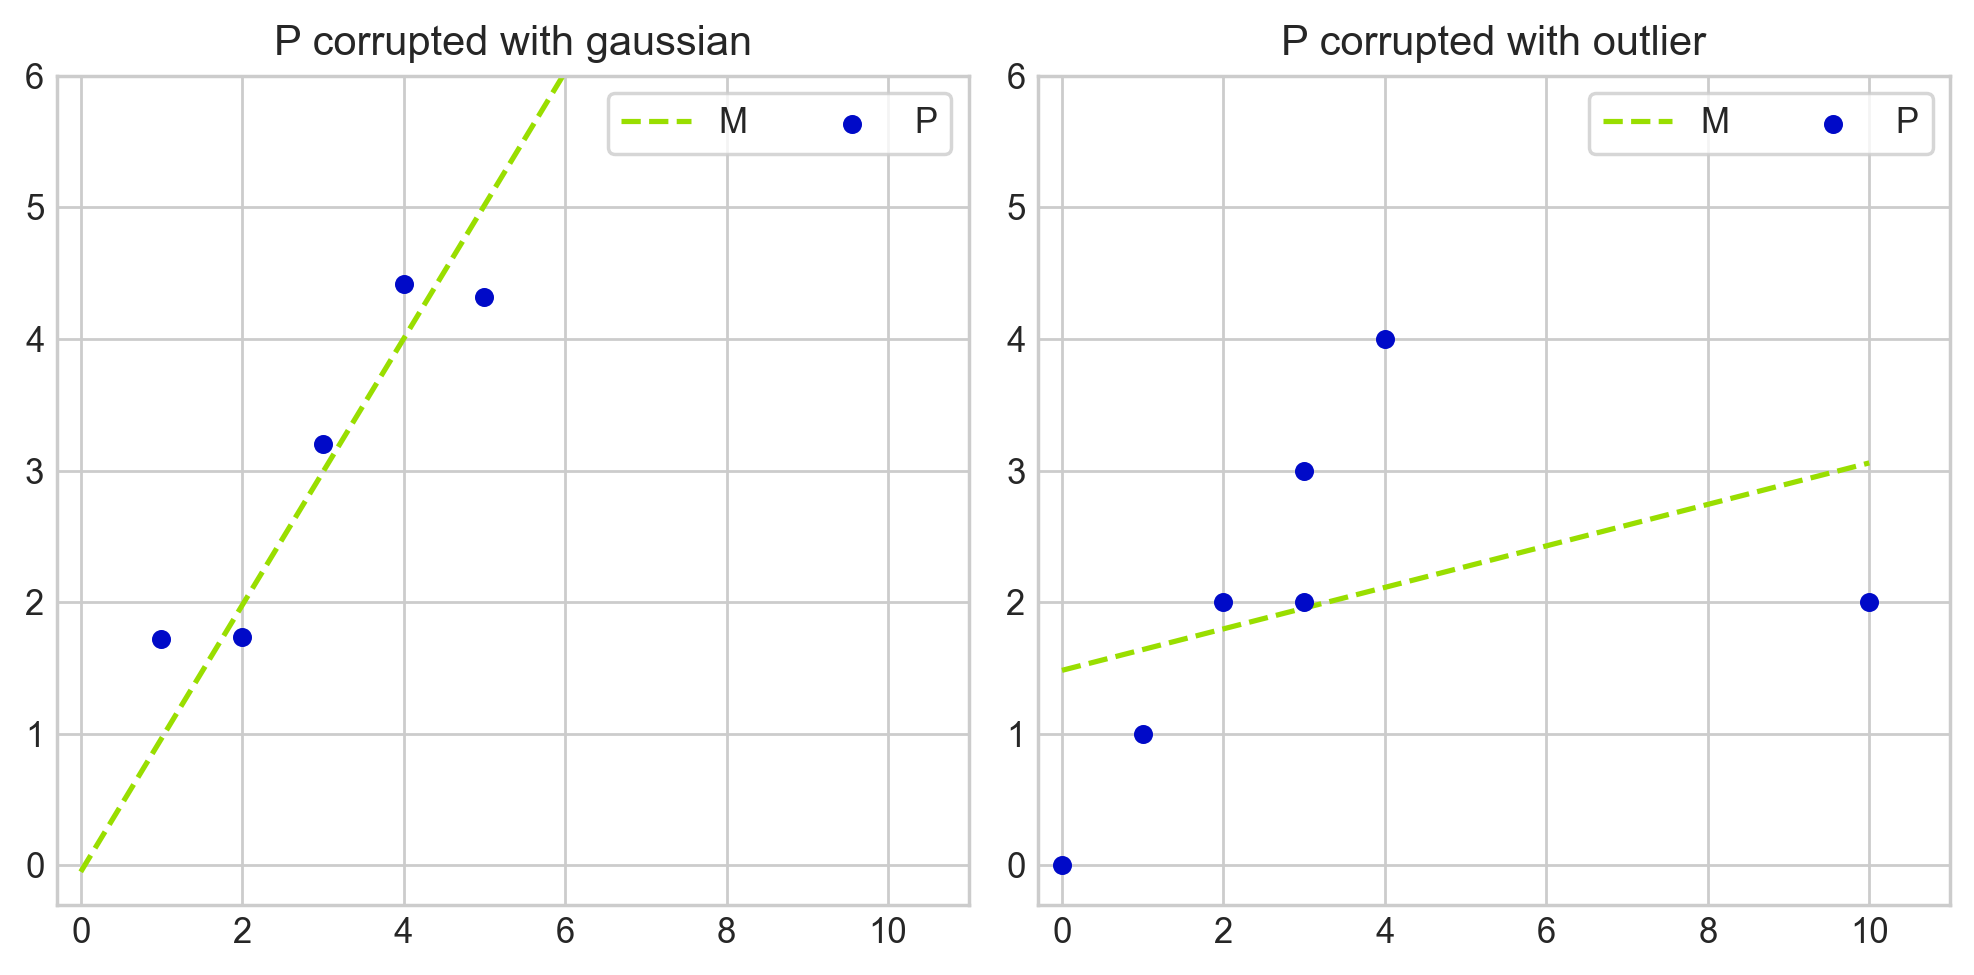

<IPython.core.display.Javascript object>

In [11]:
x = np.arange(0, 7)
y_gaussian = x.copy() + np.random.randn(*x.shape) * 0.5
P_gaussian = np.stack([x, y_gaussian], axis=1)
M_gaussian = fit_model(P_gaussian)

x, y = original_example()
P_outlier = np.stack([x, y], axis=1)
M_outlier = fit_model(P_outlier)


colors = plotting.get_palette("custom6")
with plt.rc_context(get_rc_params_small(2, 1)):
    fig, axes = plt.subplots(1, 2)
    ax_gaussian, ax_outlier = axes
    plot_P(
        ax_gaussian, P_gaussian, label="P", s=20, zorder=3, marker="o", color=colors[0]
    )
    plot_M(
        ax_gaussian,
        P_gaussian,
        M_gaussian,
        label="M",
        color=colors[3],
        zorder=1,
        linestyle="--",
    )

    plot_P(
        ax_outlier, P_outlier, label="P", s=20, zorder=3, marker="o", color=colors[0]
    )
    plot_M(
        ax_outlier,
        P_outlier,
        M_outlier,
        label="M",
        color=colors[3],
        zorder=1,
        linestyle="--",
    )

    add_legend_labels(ax_gaussian)
    add_legend_labels(ax_outlier)
    set_lim_all(axes, [-0.3, 11], [-0.3, 6])
    ax_gaussian.set_title("P corrupted with gaussian")
    ax_outlier.set_title("P corrupted with outlier")

    savefig(fname="ToyExample.png")